In [17]:
import os
import re
import matplotlib.pyplot as plt

def extract_keff_and_error(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if 'ANA_KEFF' in line:
                try:
                    keff_val = float(line[47:58])
                    keff_err = float(line[59:66])
                    return keff_val, keff_err
                except ValueError:
                    pass
    return None, None

def get_numeric_suffix(filename):
    # Match something like: fission_blanket_hex_10_res.m → 10
    #match = re.search(r'fission_blanket_hex_(\d+)_res\.m$', filename)
    #match = re.search(r'input_(\d+)_(\d+)_(d+)\.txt_res\.m$', filename)
    #return int(match.group(1)) if match else float('inf')
    match = re.search(r'input(\d+)_15_(\d+)\.txt_res', filename)
    return match.group(1) if match else ""

def read_keff_from_folder(folder_path):
    keff_values = []
    keff_errors = []
    numeric_labels = []

    all_files = [f for f in os.listdir(folder_path) if f.endswith('_res.m')]
    sorted_files = sorted(all_files, key=get_numeric_suffix)

    for file_name in sorted_files:
        number = get_numeric_suffix(file_name)
        file_path = os.path.join(folder_path, file_name)
        keff, err = extract_keff_and_error(file_path)
        if keff is not None:
            keff_values.append(keff)
            keff_errors.append(err)
            numeric_labels.append(number)

    return numeric_labels, keff_values, keff_errors

def plot_keff(labels, keff_values, keff_errors):
    if not labels:
        print("[ERROR] No keff data found.")
        return
    plt.figure(figsize=(10, 5))
    plt.errorbar(labels, keff_values, yerr=keff_errors, fmt='o-', capsize=5)
    plt.xticks(labels)
    plt.xlabel('Reflector Thickness [cm]')
    plt.ylabel('keff')
    plt.title('Optimal Reflector Thickness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Your folder here ===
folder_path = '/Users/maxle/Desktop/Desktop2/Dual/10_15_20' 


#labels, keff_values, keff_errors = read_keff_from_folder(folder_path)
#plot_keff(labels, keff_values, keff_errors)




In [ ]:
klist = []

In [68]:

klist.append(read_keff_from_folder('/Users/maxle/Desktop/Desktop2/Dual/100_15_40')[1])
print(klist)

[[0.845421], [0.89979], [0.921836], [0.922618], [0.923069], [0.974043], [0.991965], [0.993309], [0.977249], [1.01773], [1.03645], [1.03919], [1.01082], [1.04911], [1.06886], [1.06874], [1.03379], [1.06907], [1.08694], [1.08955], [1.04957], [1.08394], [1.1005], [1.10353], [1.06175], [1.09295], [1.11358], [1.11205], [1.06935], [1.10112], [1.11948], [1.11953], [1.07516], [1.10624], [1.12394], [1.12576], [1.07938], [1.11196], [1.12865], [1.12978]]


In [1]:
klist = [[0.845421], [0.89979], [0.921836], [0.922618], [0.923069], [0.974043], [0.991965], [0.993309], [0.977249], [1.01773], [1.03645], [1.03919], [1.01082], [1.04911], [1.06886], [1.06874], [1.03379], [1.06907], [1.08694], [1.08955], [1.04957], [1.08394], [1.1005], [1.10353], [1.06175], [1.09295], [1.11358], [1.11205], [1.06935], [1.10112], [1.11948], [1.11953], [1.07516], [1.10624], [1.12394], [1.12576], [1.07938], [1.11196], [1.12865], [1.12978]]

[[0.845421], [0.89979], [0.921836], [0.922618], [0.923069], [0.974043], [0.991965], [0.993309], [0.977249], [1.01773], [1.03645], [1.03919], [1.01082], [1.04911], [1.06886], [1.06874], [1.03379], [1.06907], [1.08694], [1.08955], [1.04957], [1.08394], [1.1005], [1.10353], [1.06175], [1.09295], [1.11358], [1.11205], [1.06935], [1.10112], [1.11948], [1.11953], [1.07516], [1.10624], [1.12394], [1.12576], [1.07938], [1.11196], [1.12865], [1.12978]]


In [3]:
innerlist = [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40]

In [4]:
outerlist = [10, 10, 10, 10, 20, 20, 20, 20, 30, 30, 30, 30, 40, 40, 40, 40, 50, 50, 50, 50, 60, 60, 60, 60, 70, 70, 70, 70, 80, 80, 80, 80, 90, 90, 90, 90, 100, 100, 100, 100]

In [5]:
print(len(klist), len(innerlist), len(outerlist))

40 40 40


In [10]:
import numpy as np
def cylvol(inner, outer, height = 100):
     fus_radius = 25 #25 cm of fusion core radius
     fis_radius = 15 #15 cm of fission blanket radius
     shell_vol = np.pi * height * (((inner + fus_radius)**2 - fus_radius**2) + ((outer + fis_radius + inner + fus_radius)**2 - (fis_radius + inner + fus_radius)**2))
     cap_vol = np.pi * 2 * outer * (outer + fis_radius + inner + fus_radius)**2
     tot_vol = shell_vol + cap_vol
     return tot_vol, shell_vol, cap_vol


In [14]:
volume_list = []
for i in range(len(klist)):
    volume_list.append(cylvol(innerlist[i], outerlist[i])[0])

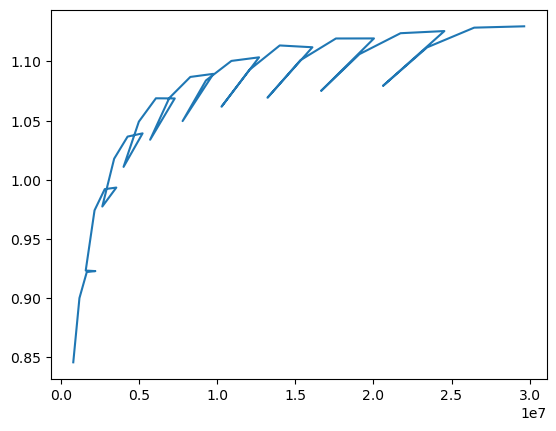

In [18]:
plt.plot(volume_list, klist)